### Web Scraping Final Project
### Akhil Varma Vegesna

In this Web scraping project, we will use BeautifulSoup to scrape Yelp website to find best American Restaurant in Chicago. We get a list of all search pages and scrape for all of them, do preprocessing, create a Pandas Dataframe, perform EDA, perform One hot encoding, Make a new column to define and select the best restaurant.

In [1]:
#Importing necessary libraries
from bs4 import BeautifulSoup
import requests
import time
import random
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#h = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
url = 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=0'
response = requests.get(url)


In [3]:
url_list =[]
n = 24
for i in range(0,230,10):
    url_list.append('https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start='+str(i))
print(url_list)
#We have a list of all url pages

['https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=0', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=10', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=20', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=30', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=40', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=50', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=60', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=70', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=80', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=90', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chicago%2C+IL&start=100', 'https://www.yelp.com/search?find_desc=Restaurants&find_loc=Chic

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
#We use lxml parser

In [5]:
#We parse for the first page to check if the parser is properly working. We store the required data in below lists. 
#We store the restaurant name, number of reviews, rating, location and all types of cuisines available in that restaurant.
#As Yelp website constantly change the class names to make web scraping challenging I searched a class in a class to get the data avoid this
res_name=[]
num_rev =[]
rat = []
cu = []
priceran =[]
Address = []


for item in soup.select('[class*=container_]'):
    try: 
        if item.find('h3'):
            if item.find('h3').get_text() is not None:
                res_name.append(item.find('h3').get_text())
                print(item.find('h3').get_text())
            else:
                res_name.append("None")
           
        
            if item.select('[class*=css-chan6m]')[0].get_text() is not None:
                num_rev.append(item.select('[class*=css-chan6m]')[0].get_text())
                print(item.select('[class*=css-chan6m]')[0].get_text())
            else: 
                num_rev.append("None")
            
            
            if item.select('[aria-label*=star]')[0]['aria-label'] is not None:
                rat.append(item.select('[aria-label*=star]')[0]['aria-label'])
                print(item.select('[aria-label*=star]')[0]['aria-label'])
            else:
                rat.append("None")
            
            

                
            
            
            if item.select('[class*=css-dzq7l1]')[0].get_text() is not None:
                cu.append(item.select('[class*=css-dzq7l1]')[0].get_text("|"))
                print(item.select('[class*=css-dzq7l1]')[0].get_text("|"))
            else:
                cu.append("None")
                
           
                
                
            
            
            
            
            
    except Exception as e:
#         priceran.append("None")
          cu.append("None")
          print('None')
print(res_name)

print(num_rev)
print(rat)
print(cu)
# print(priceran)


1. Girl & The Goat
9578
4.5 star rating
American (New)|Bakeries|Coffee & Tea|$$$|West Loop
2. The Purple Pig
7921
4 star rating
Tapas/Small Plates|Mediterranean|American (New)|$$$|Near North Side
3. The Perch
356
4.5 star rating
Breweries|American (New)|$$|West Town
4. The Dearborn
1881
4.5 star rating
Seafood|American (Traditional)|Breakfast & Brunch|$$|The Loop
5. The Whale Chicago
799
4 star rating
American (New)|$$|Logan Square
6. Pompette
15
4.5 star rating
Wine Bars|Cafes|Salad|Bucktown
7. Penumbra
752
5 star rating
Wine Bars|Seafood|Steakhouses|$$|Logan Square
8. Giant
577
4.5 star rating
American (New)|Beer Bar|Wine Bars|$$$|Logan Square
9. Amaru
312
5 star rating
Latin American|Caribbean|Cocktail Bars|$$$|Wicker Park
10. etta - Bucktown
933
4.5 star rating
Pizza|American (New)|Breakfast & Brunch|$$|Wicker Park
['1.\xa0Girl & The Goat', '2.\xa0The Purple Pig', '3.\xa0The Perch', '4.\xa0The Dearborn', '5.\xa0The Whale Chicago', '6.\xa0Pompette', '7.\xa0Penumbra', '8.\xa0Giant', 

In [6]:
#We successfullly scraped data from first page, we perform pre processing before hand and store data. 
# Each list is preprocessed and required data is stored in below lists.
name = []
num_reviews =[]
rating = []
location=[]
cuisine =[]
for i in res_name:
    i = i.split("\xa0")
    name.append(i[1])
    
for j in num_rev:
    j = j.strip("(").split()
    
    
    num_reviews.append(int(j[0]))
    
for k in rat:
    k = k.split()
    rating.append(float(k[0]))

for o in cu:
    o = o.split('|')

    location.append(o[-1])
    if o[:-2] is not None:
        cuisine.append(o[:-2])
    else: cuisine.append("None")
        
    
    
    
print(name)
print(num_reviews)
print(rating)

print(location)
print(cuisine)

['Girl & The Goat', 'The Purple Pig', 'The Perch', 'The Dearborn', 'The Whale Chicago', 'Pompette', 'Penumbra', 'Giant', 'Amaru', 'etta - Bucktown']
[9578, 7921, 356, 1881, 799, 15, 752, 577, 312, 933]
[4.5, 4.0, 4.5, 4.5, 4.0, 4.5, 5.0, 4.5, 5.0, 4.5]
['West Loop', 'Near North Side', 'West Town', 'The Loop', 'Logan Square', 'Bucktown', 'Logan Square', 'Logan Square', 'Wicker Park', 'Wicker Park']
[['American (New)', 'Bakeries', 'Coffee & Tea'], ['Tapas/Small Plates', 'Mediterranean', 'American (New)'], ['Breweries', 'American (New)'], ['Seafood', 'American (Traditional)', 'Breakfast & Brunch'], ['American (New)'], ['Wine Bars', 'Cafes'], ['Wine Bars', 'Seafood', 'Steakhouses'], ['American (New)', 'Beer Bar', 'Wine Bars'], ['Latin American', 'Caribbean', 'Cocktail Bars'], ['Pizza', 'American (New)', 'Breakfast & Brunch']]


In [7]:
#Now we perform the scraping all all the pages in the url list we created and stored in lists
res_name=[]
num_rev =[]
rat = []
cu = []
priceran =[]
Address = []

for i, url in enumerate(url_list):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    for item in soup.select('[class*=container_]'):
        try: 
            if item.find('h3'):
                if item.find('h3').get_text() is not None:
                    res_name.append(item.find('h3').get_text())
                    print(item.find('h3').get_text())
                else:
                    res_name.append("None")
           
        
                if item.select('[class*=css-chan6m]')[0].get_text() is not None:
                    num_rev.append(item.select('[class*=css-chan6m]')[0].get_text())
                    print(item.select('[class*=css-chan6m]')[0].get_text())
                else: 
                    num_rev.append("None")
            
            
                if item.select('[aria-label*=star]')[0]['aria-label'] is not None:
                    rat.append(item.select('[aria-label*=star]')[0]['aria-label'])
                    print(item.select('[aria-label*=star]')[0]['aria-label'])
                else:
                    rat.append("None")
            
            

                
            
            
                if item.select('[class*=css-dzq7l1]')[0].get_text() is not None:
                    cu.append(item.select('[class*=css-dzq7l1]')[0].get_text("|"))
                    print(item.select('[class*=css-dzq7l1]')[0].get_text("|"))
                else:
                    cu.append("None")
                
              
        except Exception as e:
#             priceran.append("None")
            cu.append("None")
    time.sleep(random.randint(1,3))
    print("Finished page"+str(i+1))

1. Girl & The Goat
(9578 reviews)
4.4 star rating
American (New)|Bakeries|Coffee & Tea|$$$|West Loop
2. The Purple Pig
(7921 reviews)
4.2 star rating
Tapas/Small Plates|Mediterranean|American (New)|$$$|Near North Side
3. The Perch
(356 reviews)
4.4 star rating
Breweries|American (New)|$$|West Town
4. The Dearborn
(1881 reviews)
4.3 star rating
Seafood|American (Traditional)|Breakfast & Brunch|$$|The Loop
5. The Whale Chicago
(799 reviews)
4.2 star rating
American (New)|$$|Logan Square
6. Pompette
(15 reviews)
4.5 star rating
Wine Bars|Cafes|Salad|Bucktown
7. Penumbra
(752 reviews)
4.8 star rating
Wine Bars|Seafood|Steakhouses|$$|Logan Square
8. Giant
(577 reviews)
4.3 star rating
American (New)|Beer Bar|Wine Bars|$$$|Logan Square
9. Amaru
(312 reviews)
4.8 star rating
Latin American|Caribbean|Cocktail Bars|$$$|Wicker Park
10. etta - Bucktown
(933 reviews)
4.3 star rating
Pizza|American (New)|Breakfast & Brunch|$$|Wicker Park
Finished page1
11. Kasama
370
4.5 star rating
Filipino|Bakeri

Asian Fusion|Brewpubs|$$|Logan Square
100. Kimchi Pop
185
4.5 star rating
Korean|$$|West Town
Finished page10
101. Ørkenoy
(54 reviews)
4.8 star rating
Breweries|Scandinavian|Cocktail Bars|$$|Humboldt Park
102. Offset BBQ
(160 reviews)
4.8 star rating
Barbeque|$$|Humboldt Park
103. Boka
(1629 reviews)
4.3 star rating
American (New)|$$$$|Lincoln Park
104. Serai
(682 reviews)
4.2 star rating
Malaysian|Asian Fusion|Desserts|$$|Logan Square
105. The StopAlong
(271 reviews)
4.5 star rating
Pizza|Burgers|Bars|$$|Bucktown
106. River Roast
(1108 reviews)
4 star rating
American (Traditional)|Cocktail Bars|Venues & Event Spaces|$$|River North
107. Lucy’s
(240 reviews)
3.9 star rating
American (Traditional)|$$|West Town
108. Beatrix - Streeterville
(1135 reviews)
4.3 star rating
American (New)|Diners|Coffee & Tea|$$|Near North Side
109. Mama Delia
(151 reviews)
3.5 star rating
Spanish|West Town
110. Table, Donkey and Stick
(478 reviews)
4.1 star rating
Modern European|Wine Bars|Cocktail Bars|$$|L

134
4 star rating
American (New)|Logan Square
197. Porto
173
3 star rating
Portuguese|Wine Bars|Seafood|Ukrainian Village
198. Quesabirria Jalisco Tacos
92
5 star rating
Mexican|$$|McKinley Park
199. Ikigai Sushi & Izakaya
31
4.5 star rating
Sushi Bars|Izakaya|Near North Side
200. Kizuki Ramen & Izakaya
802
4 star rating
Ramen|Izakaya|$$|Wicker Park
Finished page20
201. Seoul Taco
(846 reviews)
4.1 star rating
Korean|Mexican|Asian Fusion|$|Near North Side
202. Tandoor Char House
(4 reviews)
4 star rating
Indian|Pakistani|Halal|West Town
203. jeong
(146 reviews)
4.6 star rating
Korean|American (New)|$$$$|Noble Square
204. Musashiya Ramen
(59 reviews)
4.3 star rating
Ramen|Japanese Curry|$$|Lakeview
205. Tamashii Ramen
(37 reviews)
4.5 star rating
Ramen|$$|Greektown
206. Sushi + Rotary Sushi Bar - Wicker Park - Temp. CLOSED
(6 reviews)
4.8 star rating
Conveyor Belt Sushi|Sushi Bars|Wicker Park
207. XOchimilco Mexican Restaurant
(245 reviews)
4.8 star rating
Mexican|$$|Ravenswood
208. Hap

In [8]:
#We preprocess the data before hand and store them in below lists
name = []
num_reviews =[]
rating = []
location=[]
cuisine =[]
for i in res_name:
    i = i.split("\xa0")
    name.append(i[1])
    
for j in num_rev:
    j = j.strip("(").split()
    
    
    num_reviews.append(int(j[0]))
    
for k in rat:
    k = k.split()
    rating.append(float(k[0]))

for o in cu:
    o = o.split('|')

    location.append(o[-1])
    if o[:-2] is not None:
        cuisine.append(o[:-2])
    else: cuisine.append("None")
        
    
    
print(name)
print(num_reviews)
print(rating)
print(priceran)
print(location)
print(cuisine)

['Girl & The Goat', 'The Purple Pig', 'The Perch', 'The Dearborn', 'The Whale Chicago', 'Pompette', 'Penumbra', 'Giant', 'Amaru', 'etta - Bucktown', 'Kasama', 'Osteria Rusticana', 'Qing Xiang Yuan Dumplings', 'The Welcome Back Lounge', 'Split-Rail', 'Wazwan - Chicago', 'Jack’s Wicker Park', 'Forbidden Root', 'Barcocina West Town', 'Silli Kori', 'Andros Taverna', 'The Gage', 'Yardbird', 'Union', 'Testaccio', 'The Soul Food Lounge', 'Sushi + Rotary Sushi Bar - Chinatown', 'Hide+Seek', 'Tortello', 'Little Wok Wicker Park', 'The Soul Food Lounge', 'The VIG Chicago', 'Au Cheval', 'NoodleBird At Fat Rice', 'Pinched on the River', 'Casa Tequila', 'Funkenhausen', 'Oiistar', 'Gaijin', 'Daisies', 'Machine Engineered Dining & Drink', 'Cafe Istanbul', 'Antico', 'Lula Cafe', 'Maple & Ash', 'Urbanbelly', 'Aba', 'Perilla Korean American Fare', 'Mable’s Table', 'Bungalow by Middle Brow', 'Zenwich X Elite Boba - Wicker Park', 'Mott St', 'Bárbaro Taquería', 'Lost Never Found', 'Folklore Argentine Grill'

In [9]:
#We check the length of lists and see if they are compatible to create a dataframe
print(len(name))
print(len(num_reviews))
print(len(rating))

print(len(location))
print(len(cuisine))

230
230
230
230
230


In [10]:
import pandas as pd
df = pd.DataFrame(list(zip(name,num_reviews,rating,location,cuisine)), columns = ["Name","Number of reviews","Rating","Location","Cuisine"])

In [11]:
df.head(50)
#Following is the subset of dataframe

,Name,Number of reviews,Rating,Location,Cuisine
0,Girl & The Goat,9578,4.4,West Loop,"[American (New), Bakeries, Coffee & Tea]"
1,The Purple Pig,7921,4.2,Near North Side,"[Tapas/Small Plates, Mediterranean, American (..."
2,The Perch,356,4.4,West Town,"[Breweries, American (New)]"
3,The Dearborn,1881,4.3,The Loop,"[Seafood, American (Traditional), Breakfast & ..."
4,The Whale Chicago,799,4.2,Logan Square,[American (New)]
5,Pompette,15,4.5,Bucktown,"[Wine Bars, Cafes]"
6,Penumbra,752,4.8,Logan Square,"[Wine Bars, Seafood, Steakhouses]"
7,Giant,577,4.3,Logan Square,"[American (New), Beer Bar, Wine Bars]"
8,Amaru,312,4.8,Wicker Park,"[Latin American, Caribbean, Cocktail Bars]"
9,etta - Bucktown,933,4.3,Wicker Park,"[Pizza, American (New), Breakfast & Brunch]"


In [12]:
df.to_csv('wsfdataold.csv',index=False)

In [13]:
values = df['Cuisine'].values
print(values)

[list(['American (New)', 'Bakeries', 'Coffee & Tea'])
 list(['Tapas/Small Plates', 'Mediterranean', 'American (New)'])
 list(['Breweries', 'American (New)'])
 list(['Seafood', 'American (Traditional)', 'Breakfast & Brunch'])
 list(['American (New)']) list(['Wine Bars', 'Cafes'])
 list(['Wine Bars', 'Seafood', 'Steakhouses'])
 list(['American (New)', 'Beer Bar', 'Wine Bars'])
 list(['Latin American', 'Caribbean', 'Cocktail Bars'])
 list(['Pizza', 'American (New)', 'Breakfast & Brunch'])
 list(['Filipino', 'Bakeries', 'American (New)']) list(['Italian'])
 list(['Barbeque', 'Dim Sum']) list(['Bars', 'American (Traditional)'])
 list(['American (Traditional)', 'Cocktail Bars', 'Chicken Wings'])
 list(['Indian', 'Halal']) list([])
 list(['Brewpubs', 'Tapas/Small Plates', 'Cocktail Bars'])
 list(['Tacos', 'New Mexican Cuisine']) list(['Thai', 'Asian Fusion'])
 list(['Greek', 'Mediterranean'])
 list(['American (New)', 'Cocktail Bars'])
 list(['American (New)', 'Southern']) list(['American (New

In [14]:
df =df[df['Cuisine'].map(lambda d: len(d)) > 0]

In [15]:
df

,Name,Number of reviews,Rating,Location,Cuisine
0,Girl & The Goat,9578,4.4,West Loop,"[American (New), Bakeries, Coffee & Tea]"
1,The Purple Pig,7921,4.2,Near North Side,"[Tapas/Small Plates, Mediterranean, American (..."
2,The Perch,356,4.4,West Town,"[Breweries, American (New)]"
3,The Dearborn,1881,4.3,The Loop,"[Seafood, American (Traditional), Breakfast & ..."
4,The Whale Chicago,799,4.2,Logan Square,[American (New)]
...,...,...,...,...,...
225,Obelix,36,4.6,River North,"[French, Wine Bars]"
226,SGD Dubu So Gong Dong Tofu & Korean BBQ,51,3.8,West Loop,"[Korean, Barbeque, Seafood]"
227,Alla Vita,257,4.3,West Loop,[Italian]
228,Kim’s Korean Cuisine and Sushi,61,4.8,Lakeview,"[Korean, Sushi Bars]"


In [16]:
#Performing one hot encoding
#As we need to select one of the cuisine this step is necessary
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

ohe_df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('Cuisine')),
                index=df.index,
                columns=mlb.classes_))

In [17]:
ohe_df
#One hot encoded dataset

,Name,Number of reviews,Rating,Location,American (New),American (Traditional),Argentine,Asian Fusion,Bakeries,Barbeque,...,Tex-Mex,Thai,Turkish,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Whiskey Bars,Wine Bars
0,Girl & The Goat,9578,4.4,West Loop,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,The Purple Pig,7921,4.2,Near North Side,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Perch,356,4.4,West Town,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dearborn,1881,4.3,The Loop,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Whale Chicago,799,4.2,Logan Square,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Obelix,36,4.6,River North,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
226,SGD Dubu So Gong Dong Tofu & Korean BBQ,51,3.8,West Loop,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
227,Alla Vita,257,4.3,West Loop,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,Kim’s Korean Cuisine and Sushi,61,4.8,Lakeview,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
ohe_df.to_csv('wsfdata.csv',index=False)
#Dataset stored for future use

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('wsfdata.csv')
print(df)
#Dataset retrieved again

                                        Name  Number of reviews  Rating  \
0                            Girl & The Goat               9578     4.4   
1                             The Purple Pig               7921     4.2   
2                                  The Perch                356     4.4   
3                               The Dearborn               1881     4.3   
4                          The Whale Chicago                799     4.2   
..                                       ...                ...     ...   
209                                   Obelix                 36     4.6   
210  SGD Dubu So Gong Dong Tofu & Korean BBQ                 51     3.8   
211                                Alla Vita                257     4.3   
212           Kim’s Korean Cuisine and Sushi                 61     4.8   
213       The Hampton Social - Streeterville                641     4.2   

            Location  American (New)  American (Traditional)  Argentine  \
0          West Loop    

In [21]:
print(df.columns)
#All columns

Index(['Name', 'Number of reviews', 'Rating', 'Location', 'American (New)',
       'American (Traditional)', 'Argentine', 'Asian Fusion', 'Bakeries',
       'Barbeque',
       ...
       'Tex-Mex', 'Thai', 'Turkish', 'Ukrainian', 'Vegan', 'Vegetarian',
       'Venues & Event Spaces', 'Vietnamese', 'Whiskey Bars', 'Wine Bars'],
      dtype='object', length=105)


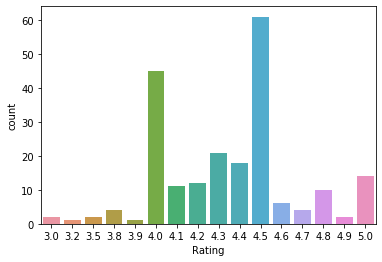

In [22]:
sns.countplot(x ='Rating', data=df)
plt.show()
#This plot shows how the ratings are given for each restaurant. 
# We see that 4.5 is the most popular rating and 4.0 is second most popular rating

[Text(0, 0, 'West Loop'),
 Text(0, 0, 'Near North Side'),
 Text(0, 0, 'West Town'),
 Text(0, 0, 'The Loop'),
 Text(0, 0, 'Logan Square'),
 Text(0, 0, 'Bucktown'),
 Text(0, 0, 'Wicker Park'),
 Text(0, 0, 'Chinatown'),
 Text(0, 0, 'Ukrainian Village'),
 Text(0, 0, 'Lawndale'),
 Text(0, 0, 'Old Town'),
 Text(0, 0, 'Fulton Market'),
 Text(0, 0, 'River West'),
 Text(0, 0, 'Lakeview'),
 Text(0, 0, 'Humboldt Park'),
 Text(0, 0, 'Near West Side'),
 Text(0, 0, 'South Loop'),
 Text(0, 0, 'Noble Square'),
 Text(0, 0, 'Pilsen'),
 Text(0, 0, 'Andersonville'),
 Text(0, 0, 'Avondale'),
 Text(0, 0, 'DePaul'),
 Text(0, 0, 'River North'),
 Text(0, 0, 'Lincoln Park'),
 Text(0, 0, 'University Village'),
 Text(0, 0, 'Uptown'),
 Text(0, 0, 'Ravenswood'),
 Text(0, 0, 'McKinley Park'),
 Text(0, 0, 'Greektown')]

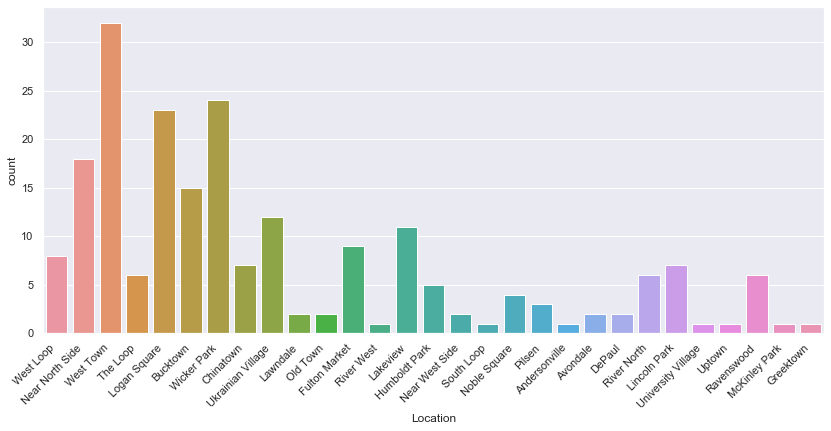

In [29]:
df = df[df.Location != '$$']
a = sns.set(rc={"figure.figsize":(14,6)})
a =sns.countplot(x ='Location', data = df)
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
#We will see where most restaurants in Chicago are located. We see that Logan square has most number of restaurants followed by West town and Wicher park 

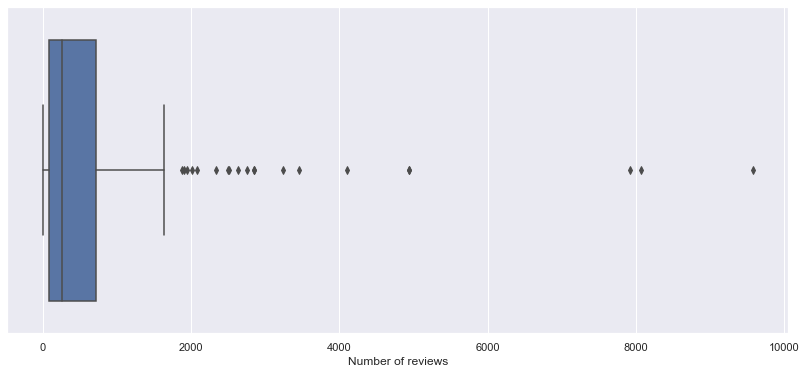

In [30]:
sns.set(rc={"figure.figsize":(14,6)})
sns.boxplot(data = df, x = "Number of reviews")
#We see a boxplot of number of reviews for each restaurant. We see that most values lie within 1000. Some really famous restaurants ahve more than 2000 ranging to aroung 9500

In [31]:
df['Score'] = df['Number of reviews'] * df['Rating']
#We create a new column called score which is Number of Review * Rating. 
# As we its not reasonable to decide the best restaurant without taken both into consideration I have create this new column
#The restaurant with specific cuisine and highest score becomes the best restaurant

In [32]:
df

,Name,Number of reviews,Rating,Location,American (New),American (Traditional),Argentine,Asian Fusion,Bakeries,Barbeque,...,Thai,Turkish,Ukrainian,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Whiskey Bars,Wine Bars,Score
0,Girl & The Goat,9578,4.4,West Loop,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,42143.2
1,The Purple Pig,7921,4.2,Near North Side,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33268.2
2,The Perch,356,4.4,West Town,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1566.4
3,The Dearborn,1881,4.3,The Loop,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8088.3
4,The Whale Chicago,799,4.2,Logan Square,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3355.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Obelix,36,4.6,River North,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,165.6
210,SGD Dubu So Gong Dong Tofu & Korean BBQ,51,3.8,West Loop,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,193.8
211,Alla Vita,257,4.3,West Loop,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1105.1
212,Kim’s Korean Cuisine and Sushi,61,4.8,Lakeview,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,292.8


In [33]:
adf =df.loc[df['American (New)'] == 1].sort_values(by='Score',ascending=False)
#We select all restaurants that offer cuisine 'American New' and sort them in descending order by score and store them in a new dataset

In [34]:
adf.loc[:, ['Name', 'Number of reviews', 'Rating', 'Location','Score']]


,Name,Number of reviews,Rating,Location,Score
0,Girl & The Goat,9578,4.4,West Loop,42143.2
1,The Purple Pig,7921,4.2,Near North Side,33268.2
20,The Gage,3242,4.0,The Loop,12968.0
205,Alinea,2494,4.4,Lincoln Park,10973.6
41,Lula Cafe,2082,4.3,Logan Square,8952.6
74,Cindy’s Rooftop,2019,4.1,The Loop,8277.9
99,Boka,1629,4.3,Lincoln Park,7004.7
104,Beatrix - Streeterville,1135,4.3,Near North Side,4880.5
116,The Bristol,1209,4.0,Bucktown,4836.0
112,The Bristol,1209,4.0,Bucktown,4836.0


We see that 'Girl & The Goat' located in West Loop has the highest score with a rating of 4.5 and 9578 reviews. Hence we decide that this is the best restaurant that offers American(New) cuisine in Chicago.

This can be used for recreational purpose as well as commercial purpose where restaurants can improve their business by attracting more customers when food order apps like yelp, Uber eats, door dash employ this techinique to recomment best restaurants for their customers.